In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tifffile as tif
import tkinter as tk
from tkinter import filedialog, messagebox

# Función para calcular el perfil de intensidad a lo largo de un segmento
def get_intensity_profile(image, start, end, dpi):
    # Convertir coordenadas de píxeles a milímetros
    start_mm = (start[0] / dpi * 25.4, start[1] / dpi * 25.4)
    end_mm = (end[0] / dpi * 25.4, end[1] / dpi * 25.4)

    # Calcular la longitud del segmento en milímetros
    length_mm = np.sqrt((end_mm[0] - start_mm[0])**2 + (end_mm[1] - start_mm[1])**2)

    # Calcular los puntos del segmento en píxeles
    points = np.linspace(start, end, int(length_mm * dpi / 25.4), dtype=int)

    # Extraer la intensidad de los píxeles a lo largo del segmento
    intensities = [image[y, x] for x, y in points]

    # Calcular las distancias en milímetros
    distances_mm = np.linspace(0, length_mm, len(intensities))

    return distances_mm, intensities

def ElegirArchivos():
        tk.Tk().withdraw()
        filename =  filedialog.askopenfilenames(title='Seleccionar imagen', 
                                                filetypes=(('Imagen TIF','*.tif'), ('Imagen TIFF','*.tiff'), ('All Files','*.')))
        return filename



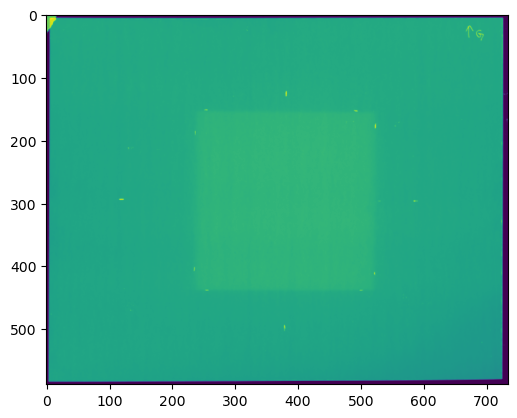

In [18]:
path = list(ElegirArchivos())    #Si se eligen varias imagenes, self.path es una lista de paths
        
imagenes = []
for path in path:
    imagen = np.array(tif.imread(path), np.uint16)
    #  print(type(imagen), imagen.shape)
    #Invierte y elegi canal
    imagen_invertida = np.invert(imagen[:,:,1])   # Green 
    imagenes.append(imagen_invertida)

pila_imagenes = np.stack(imagenes, axis=0)
imagen_promedio = np.mean(pila_imagenes, axis=0)
imagen = np.uint16(imagen_promedio)

plt.imshow(imagen)

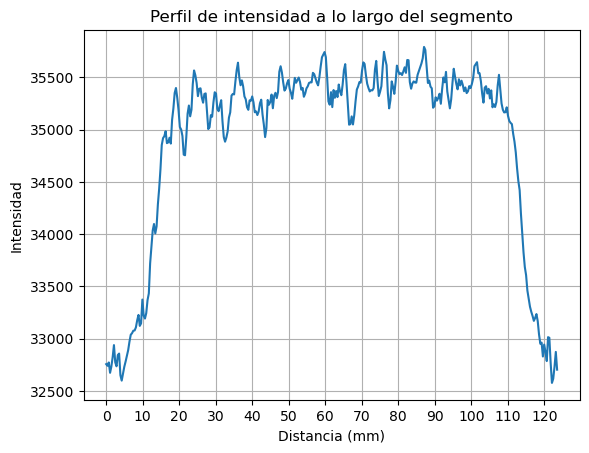

In [27]:
# Obtener el DPI de la imagen
dpi = float(72)

# Obtener las coordenadas de los puntos inicial y final
start_x = 200
start_y = 280
end_x = 550
end_y = 280

# start_x = 360
# start_y = 100
# end_x = 360
# end_y = 500

start = (start_x, start_y)
end = (end_x, end_y)

# Obtener el perfil de intensidad a lo largo del segmento
distances, intensities = get_intensity_profile(imagen, start, end, dpi)

# Graficar el perfil de intensidad
plt.figure()
plt.plot(distances, intensities)
plt.xlabel("Distancia (mm)")
plt.ylabel("Intensidad")
plt.title("Perfil de intensidad a lo largo del segmento")

# Agregar una cuadrícula
plt.grid(True)
# Establecer ticks más pequeños en el eje x
plt.xticks(np.arange(min(distances), max(distances) + 1, 10))

plt.show()